In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/sw/v6mqjcy945n6c0dl4t8s6rh80000gn/T/ipykernel_1175/687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the data
df_exams = pd.read_csv('./datasets/diabete-exams.csv')
df_exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_patient  100 non-null    int64 
 1   gender      100 non-null    object
 2   age         100 non-null    int64 
 3   weight      100 non-null    int64 
 4   height      100 non-null    int64 
 5   result      100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [3]:
# Present the first 10 rows
print(df_exams.head(10))

   id_patient gender  age  weight  height  result
0           1      M   46      83     165      98
1           2      F   23      83     164      82
2           3      M   39      71     154      93
3           4      F   26     103     165      95
4           5      M   27      55     176     100
5           6      M   64      93     190     117
6           7      F   21      70     182      90
7           8      F   60     101     179      84
8           9      F   63      83     189      92
9          10      F   65      78     175     121


In [4]:
# Remove the id_patient column
df_exams.drop(columns=['id_patient'], axis=1, inplace=True)

In [5]:
# Convert a categorical variable (gender) into a numerical variable using one-hot encoding
df_exams = pd.get_dummies(df_exams, columns=['gender'], dtype='int64')
df_exams

,age,weight,height,result,gender_F,gender_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
...,...,...,...,...,...,...
95,52,96,183,89,1,0
96,68,108,169,105,1,0
97,21,95,154,125,0,1
98,41,109,173,128,0,1


<Axes: >

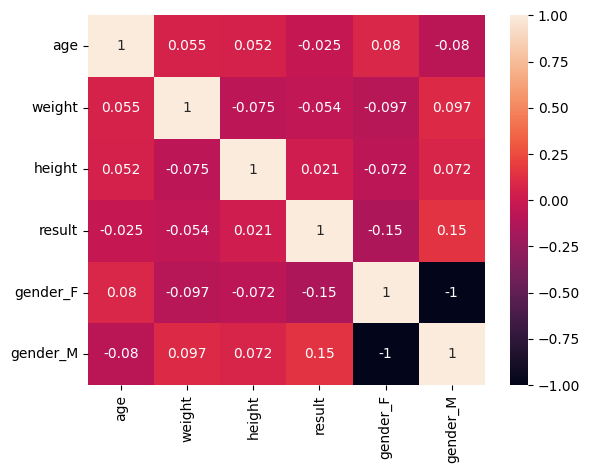

In [6]:
# Present HeatMap correlating the dataframe variables:
sns.heatmap(df_exams.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

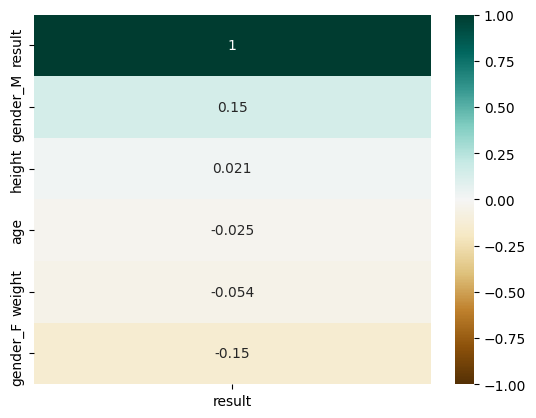

In [7]:
# Correlation Map using the target variable (result)
sns.heatmap(df_exams.corr()[['result']].sort_values(by='result', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='weight', ylabel='age'>,
        <Axes: xlabel='height', ylabel='age'>,
        <Axes: xlabel='result', ylabel='age'>,
        <Axes: xlabel='gender_F', ylabel='age'>,
        <Axes: xlabel='gender_M', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='height', ylabel='weight'>,
        <Axes: xlabel='result', ylabel='weight'>,
        <Axes: xlabel='gender_F', ylabel='weight'>,
        <Axes: xlabel='gender_M', ylabel='weight'>],
       [<Axes: xlabel='age', ylabel='height'>,
        <Axes: xlabel='weight', ylabel='height'>,
        <Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='result', ylabel='height'>,
        <Axes: xlabel='gender_F', ylabel='height'>,
        <Axes: xlabel='gender_M', ylabel='height'>],
       [<Axes: xlabel='age', ylabel='result'>,
        <Axes: xlabel='weight', ylabel='result'>,
        <Axes: 

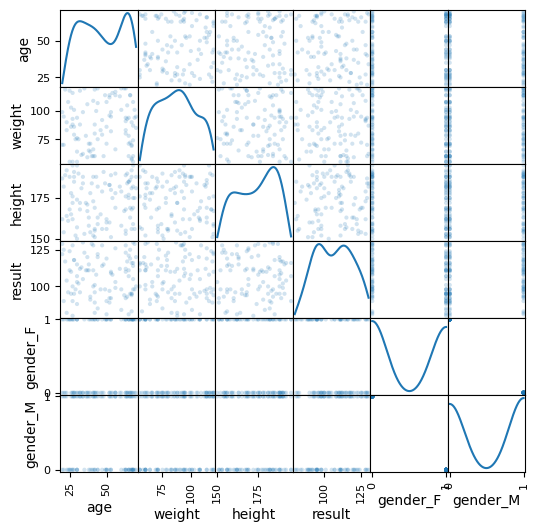

In [8]:
# Scatter Plot with Distribution
pd.plotting.scatter_matrix(df_exams, alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'result'}>],
       [<Axes: title={'center': 'gender_F'}>,
        <Axes: title={'center': 'gender_M'}>, <Axes: >, <Axes: >]],
      dtype=object)

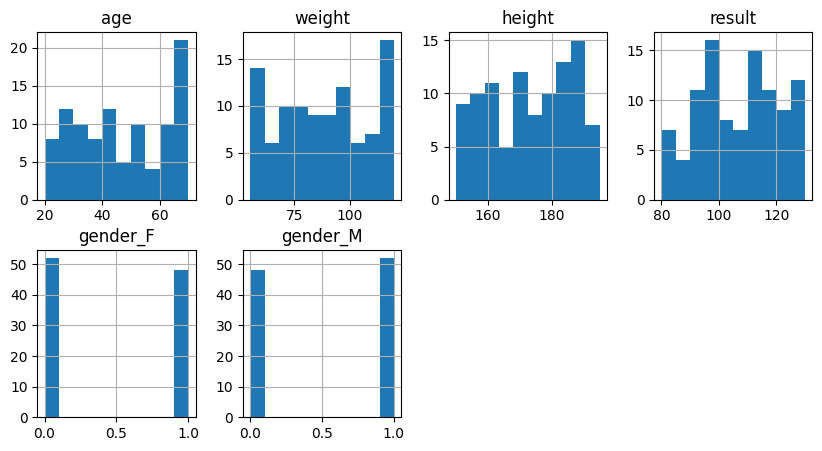

In [9]:
# Histogram of all variables
df_exams.hist(layout=(2,4), figsize=(10,5))

In [10]:
# Create a new feature
# BMI (Body Mass Index) = weight (kg) / height (m)²
df_exams['bmi'] = df_exams['weight'] / (df_exams['height'] / 100) ** 2

In [11]:
df_exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       100 non-null    int64  
 1   weight    100 non-null    int64  
 2   height    100 non-null    int64  
 3   result    100 non-null    int64  
 4   gender_F  100 non-null    int64  
 5   gender_M  100 non-null    int64  
 6   bmi       100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [32]:
# Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [16]:
# Model 1 - Without BMI
# Define the variables
X = df_exams.drop(columns=['result', 'bmi'])
y = df_exams['result']

In [17]:
# Divide the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [19]:
# Train the Linear Regression algorithm - Model 1
model_1 = LinearRegression().fit(X_train, y_train)

In [20]:
# Generate predictions for the test dataset based on the model_1
y_pred = model_1.predict(X_test)

In [25]:
# Linear Regression - Line Equation
model_1.coef_


array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [26]:
# Linear Regression - Intercept
model_1.intercept_

94.21133142019855

In [27]:
# R2 Score - Training Dataset
model_1.score(X_train, y_train)

0.06218388634297234

In [30]:
# R2 Score - Test Dataset
model_1.score(X_test, y_test)

-0.13640904479106375

In [31]:
# R2 Score - Tests
r2_score(y_test, y_pred)

-0.13640904479106375

In [33]:
# MAE - Mean Absolute Error
mean_absolute_error(y_test, y_pred)

12.695569181179543

In [34]:
# Model 2 - With BMI
X = pd.DataFrame(df_exams['bmi'])

In [35]:
# Divide the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [36]:
# Train the Linear Regression algorithm - Model 2
model_2 = LinearRegression().fit(X_train, y_train)

In [37]:
# Generate predictions for the test dataset based on the model_2
y_pred = model_2.predict(X_test)

In [38]:
model_2.coef_

array([-0.21677589])

In [39]:
model_2.intercept_

112.15019229088837

In [40]:
# R2 Score - Training Dataset
model_2.score(X_train, y_train)

0.01528596266480664

In [41]:
# R2 Score - Test Dataset
model_2.score(X_test, y_test)

-0.08898328562401758

In [42]:
# MAE - Mean Absolute Error
mean_absolute_error(y_test, y_pred)

12.5056514070601

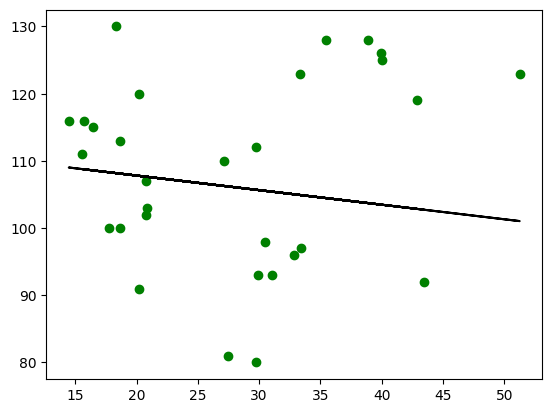

In [46]:
# Show how the line was calculated
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='k')